In [1]:

import argparse
from itertools import product
import os
import re

from bdpy.dataform import Features, DecodedFeatures
from hdf5storage import loadmat
import numpy as np
import pandas as pd
import yaml

In [2]:

# base_path 
base_path = '/home/nu/data/contents_shared/ImageNetTest/derivatives/features'

In [3]:
os.listdir(base_path + '/pytorch')

['CLIP',
 'CORnet_R',
 'CORnet_RT',
 'CORnet_R_obsolete',
 'CORnet_R_random_weight',
 'CORnet_S',
 'CORnet_S_obsolete',
 'CORnet_S_random_weight',
 'CORnet_Z',
 'CORnet_Z_obsolete',
 'CORnet_Z_random_weight',
 'NakamuraVGG19',
 'PT_AlexNet',
 'VGG19',
 'VGG19_caffe_prep',
 'VGG_ILSVRC_19_layers',
 'alexnet_1fc',
 'alexnet_2fc',
 'alexnet_4fc',
 'alexnet_5fc',
 'alexnet_5fc_dkn1',
 'alexnet_6fc',
 'alexnet_7fc',
 'alexnet_SIN',
 'alexnet_inception',
 'alexnet_inception_nofc',
 'alexnet_recurrent',
 'alexnet_skip',
 'alexnet_skip_nofc',
 'atlasnet_sphere1_nview24_viewer',
 'atlasnet_square5_nview24_viewer',
 'brain_diffuser_vdvae_decoder',
 'brain_diffuser_versatile_diffusion',
 'dcn_512',
 'dcn_8192',
 'dcn_conv_16384',
 'dcn_conv_512',
 'dcn_conv_8192',
 'dkn_fc',
 'dkn_size1',
 'dkn_size2',
 'dkn_size3',
 'dkn_size4',
 'dkn_size5',
 'fcn8s',
 'nonaka_alexnet_fc',
 'nonaka_alexnet_nofc',
 'plain22',
 'plain34',
 'plain34_corrected',
 'plain50',
 'plain50_corrected',
 'plain8',
 'plain8

In [4]:
vgg19_net = 'caffe/VGG_ILSVRC_19_layers'

vitb_32 = 'pytorch/CLIP'

In [5]:
vgg_feat = Features(os.path.join(base_path, vgg19_net))

In [6]:

clip_feat = Features(os.path.join(base_path, vitb_32) )

In [8]:
vgg_last = vgg_feat.get_features('fc8')

In [9]:
clip_last = clip_feat.get_features('output').squeeze()

In [10]:
imagery_sample_index = [0, 2,4, 8, 12, 15, 18, 35, 44, 46]


In [11]:
np.array(clip_feat.labels)[imagery_sample_index]

array(['n01443537_22563', 'n01677366_18182', 'n01858441_11077',
       'n02128385_20264', 'n02416519_12793', 'n02690373_7713',
       'n02882301_14188', 'n03710193_22225', 'n04297750_25624',
       'n04507155_21299'], dtype='<U15')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

def calculate_similarity(matrix, metric='cosine'):
    """
    指定された指標で行列の類似度行列を計算する関数。

    :param matrix: 入力行列（numpy配列）
    :param metric: 類似度の指標（'cosine' または 'correlation'）
    :return: 類似度行列（numpy配列）
    """
    if metric == 'cosine':
        return cosine_similarity(matrix)
    elif metric == 'correlation':
        # 相関係数を計算し、1からそれを引いて距離行列を作成
        distance_matrix = pdist(matrix, metric='correlation')
        similarity_matrix = 1 - squareform(distance_matrix)
        return similarity_matrix
    else:
        raise ValueError("Unsupported metric. Use 'cosine' or 'correlation'.")

def plot_hierarchical_clustering(matrix, metric='cosine'):
    """
    与えられた行列の類似度行列を計算し、階層的クラスタリングを行ってデンドログラムを表示する関数。

    :param matrix: 入力行列（numpy配列）
    :param metric: 類似度の指標（'cosine' または 'correlation'）
    """
    # 類似度行列を計算
    similarity_matrix = calculate_similarity(matrix, metric)
    
    # 距離行列を計算（類似度行列から）
    distance_matrix = 1 - similarity_matrix
    
    # 階層的クラスタリングのリンクマトリックスを計算
    linkage_matrix = linkage(distance_matrix, method='ward')
    
    # デンドログラムをプロット
    plt.figure(figsize=(10, 8))
    dendrogram(linkage_matrix, labels=range(1, matrix.shape[0] + 1))
    plt.title(f'Hierarchical Clustering Dendrogram ({metric} similarity)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

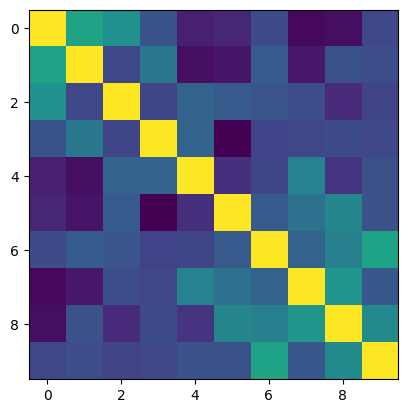

In [13]:
plt.imshow(calculate_similarity(vgg_last[imagery_sample_index].reshape(len(imagery_sample_index), -1), metric='correlation'))

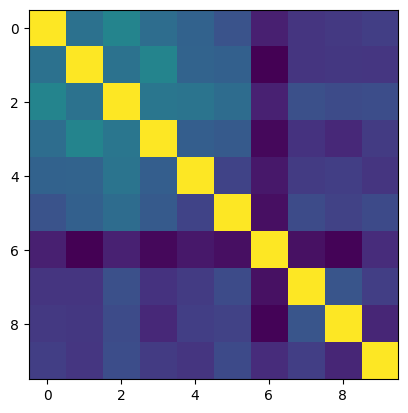

In [14]:
plt.imshow(calculate_similarity(clip_last[imagery_sample_index], metric='correlation'))

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

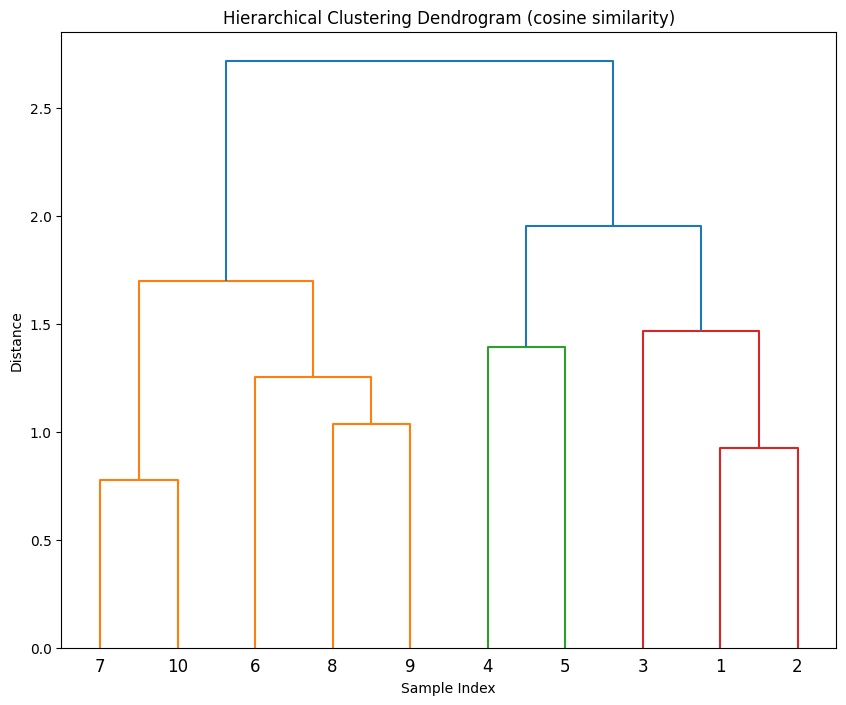

In [16]:
plot_hierarchical_clustering(vgg_last[imagery_sample_index].reshape(len(imagery_sample_index), -1))

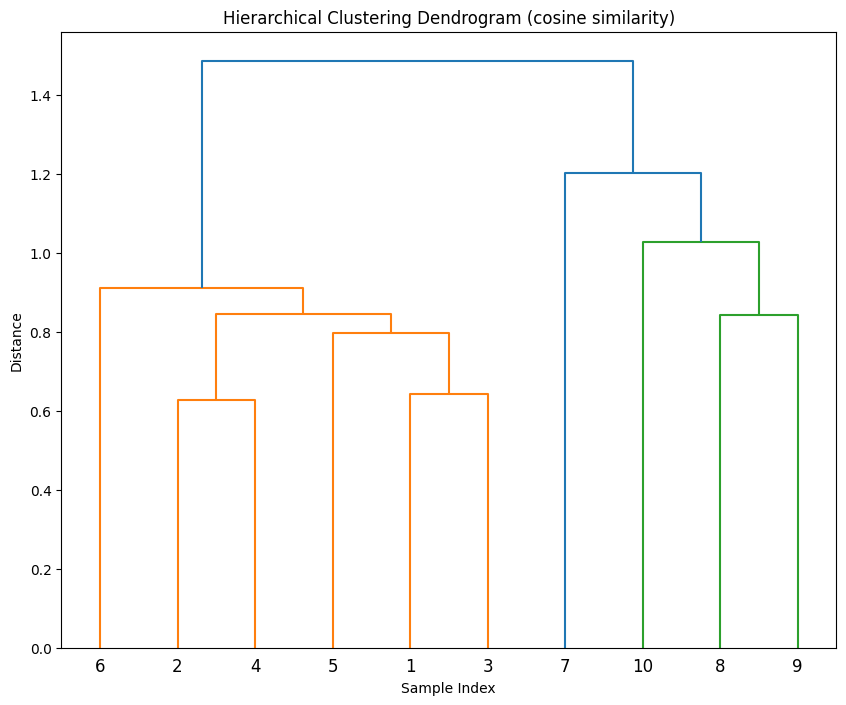

In [17]:
plot_hierarchical_clustering(clip_last[imagery_sample_index])

In [109]:
vgg_last = vgg_feat.get_features('fc8')

In [53]:
layer_list = 

SyntaxError: invalid syntax (3758865919.py, line 1)

In [19]:
vgg_layer = ['conv1_1',
 'conv1_2',
 'conv2_1',
 'conv2_2',
 'conv3_1',
 'conv3_2',
 'conv3_3',
 'conv3_4',
 'conv4_1',
 'conv4_2',
 'conv4_3',
 'conv4_4',
 'conv5_1',
 'conv5_2',
 'conv5_3',
 'conv5_4',
 'fc6',
 'fc7',
 'fc8']

vgg_layer = [
 'conv1_2',
 'conv2_2',
  'conv3_4',
   'conv4_4',
    'conv5_4',
    'fc6',
 'fc7',
 'fc8']


 




In [20]:
vgg_layers = [1/8 * vgg_feat.get_features(layer)[imagery_sample_index].reshape(len(imagery_sample_index), -1) for layer in vgg_layer]

In [21]:
clip_layers = clip_feat.get_features('output').squeeze()

In [22]:
merge_feat_vgg = np.concatenate(vgg_layers, axis=1)

In [23]:
merge_feat = np.concatenate([merge_feat_vgg, clip_layers[imagery_sample_index]], axis=1)

In [24]:
aa = calculate_similarity(merge_feat)

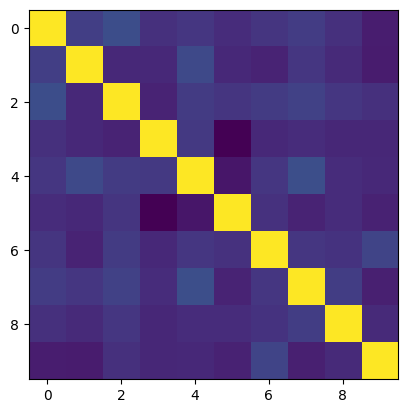

In [25]:
plt.imshow(aa)

/tmp/ipykernel_19158/1468841145.py:40: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


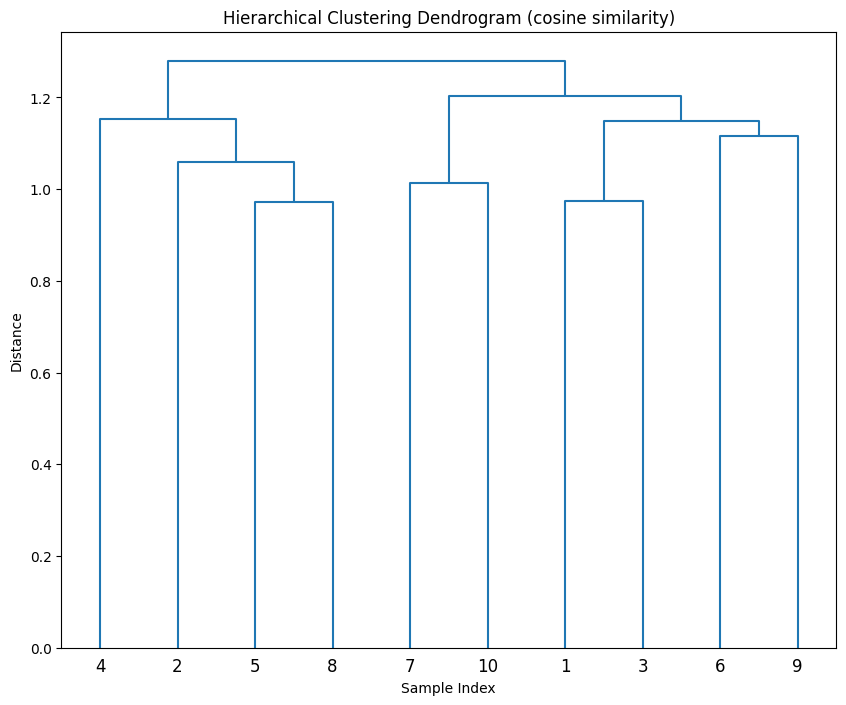

In [26]:
plot_hierarchical_clustering(merge_feat)

In [33]:
vgg_layer_mat = [1/8* calculate_similarity(vgg_feat.get_features(layer)[imagery_sample_index].reshape(len(imagery_sample_index), -1)) for layer in vgg_layer]

In [37]:
clip_layers_mat =  [calculate_similarity(clip_feat.get_features('output')[imagery_sample_index].squeeze())]

In [41]:
merge_mat = vgg_layer_mat +  clip_layers_mat

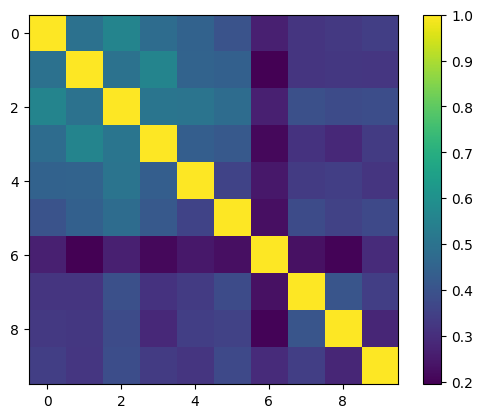

In [49]:
plt.imshow(merge_mat[8])
plt.colorbar()

In [52]:
ave_mat = np.mean(merge_mat,0)

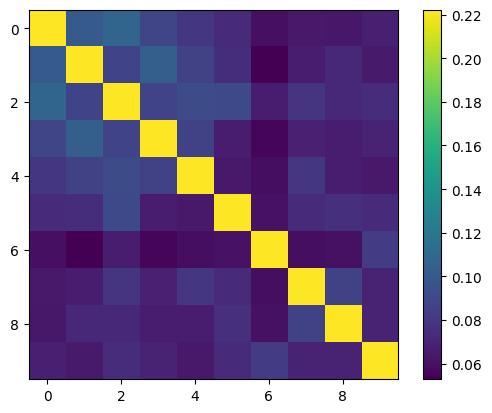

In [54]:
plt.imshow(ave_mat)
plt.colorbar()

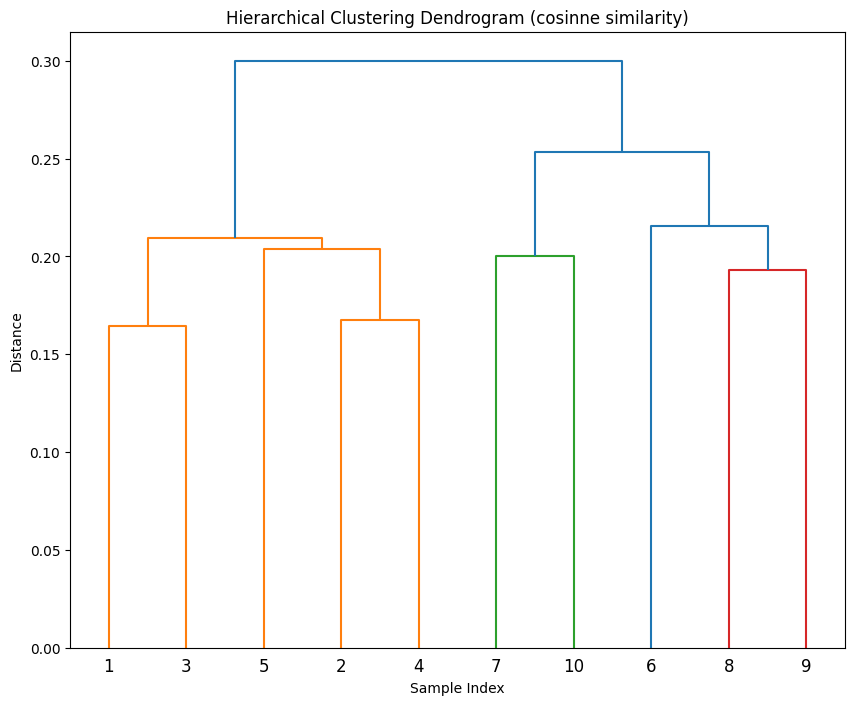

In [56]:
 # 距離行列を計算（類似度行列から）
distance_matrix = 1 - ave_mat
    
# 階層的クラスタリングのリンクマトリックスを計算
linkage_matrix = linkage(distance_matrix, method='ward')
    
# デンドログラムをプロット
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=range(1, ave_mat.shape[0] + 1))
plt.title(f'Hierarchical Clustering Dendrogram (cosinne similarity)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()